### End to end project

In [1]:
# fetch data

In [78]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import hashlib
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

In [3]:
DOWNOLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNOLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    housing_tgz  = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [5]:
# load data using pandas

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


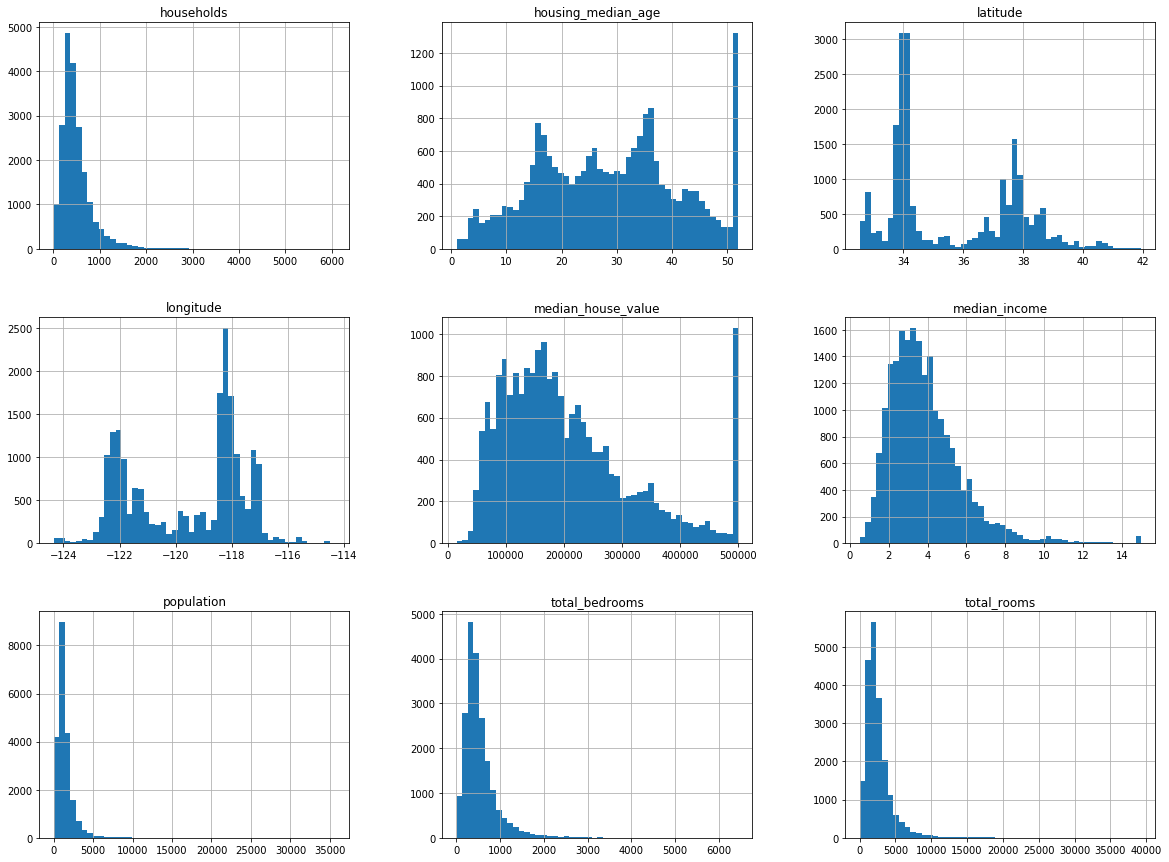

In [12]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [13]:
# Create a test set 

In [14]:
# Option 1

In [15]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    trainig_indices = shuffled_indices[test_set_size:]
    return data.iloc[trainig_indices], data.iloc[test_indices]
     

In [16]:
# this will always generate a new sets 
# so in this way the data may be "warn out"
train_set, test_set = split_train_test(housing, 0.2)

In [17]:
print(len(train_set), len(test_set))

16512 4128


In [18]:
# Option 2

In [19]:
# using hash 

In [20]:
for h in hashlib.md5(np.int64(1)).digest():
    print(h)

51
205
236
204
206
190
128
50
159
31
219
238
127
88
116
203


In [21]:
type(hashlib.md5(np.int64(1)).digest())

bytes

In [22]:
hash_bytes = hashlib.md5(np.int64(1)).digest()

In [23]:
len(hash_bytes)

16

In [24]:
int1 = np.int64(1)

In [25]:
len(bytes(int1))

1

In [26]:
int2 = np.int64(10**10)

In [27]:
len(bytes(int2))

10000000000

In [28]:
int3 = np.int64(10)

In [29]:
def bytes_len(np_num):
    return len(bytes(np_num))

In [30]:
bytes_len(int3)

10

In [31]:
int4 = np.int64(100)

In [32]:
int4

100

In [33]:
bytes_len(int4)

100

In [34]:
bytes(int4)

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [35]:
hashlib.md5(np.int64(1)).digest()[-1]

203

In [36]:
# At any point you can ask it for the digest of the concatenation of the strings fed to it 
# so far using the digest() or hexdigest() methods.
# https://docs.python.org/2/library/hashlib.html
hashlib.md5(np.int64(1)).digest()

b'3\xcd\xec\xcc\xce\xbe\x802\x9f\x1f\xdb\xee\x7fXt\xcb'

In [37]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio;

In [38]:
a = [1, 2 , 3 , 4]
a[-1]

4

In [39]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [40]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
housing[housing["latitude"] < 34.0].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2665,-115.52,33.12,38.0,1327.0,262.0,784.0,231.0,1.8793,60800.0,INLAND
2666,-115.52,33.13,18.0,1109.0,283.0,1006.0,253.0,2.1630,53400.0,INLAND
2667,-115.51,33.12,21.0,1024.0,218.0,890.0,232.0,2.1010,46700.0,INLAND
2668,-115.46,33.19,33.0,1234.0,373.0,777.0,298.0,1.0000,40000.0,INLAND
2669,-115.51,33.24,32.0,1995.0,523.0,1069.0,410.0,1.6552,43300.0,INLAND


In [42]:
housing.loc[np.arange(5, 30, 3)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
14,-122.26,37.85,52.0,2643.0,626.0,1212.0,620.0,1.9167,159200.0,NEAR BAY
17,-122.27,37.85,52.0,1228.0,293.0,648.0,303.0,2.1202,155500.0,NEAR BAY
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
26,-122.28,37.85,49.0,1130.0,244.0,607.0,239.0,2.4597,93800.0,NEAR BAY
29,-122.28,37.84,52.0,729.0,160.0,395.0,155.0,1.6875,132000.0,NEAR BAY


In [43]:
housing_with_id = housing.reset_index()

In [44]:
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [45]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [46]:
# option 3 

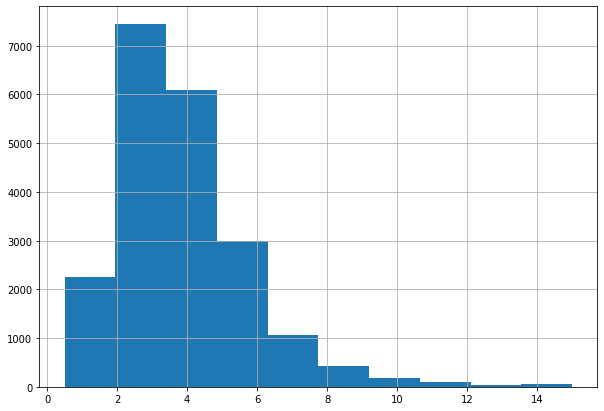

In [47]:
housing["median_income"].hist(figsize=(10,7))


In [48]:
?housing.hist

In [49]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

In [50]:
housing[housing["income_cat"] > 5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
128,-122.21,37.83,40.0,4991.0,674.0,1616.0,654.0,7.5544,411500.0,NEAR BAY,6.0
131,-122.19,37.84,18.0,1617.0,210.0,533.0,194.0,11.6017,392600.0,NEAR BAY,8.0
134,-122.19,37.83,28.0,1326.0,184.0,463.0,190.0,8.2049,335200.0,NEAR BAY,6.0
135,-122.20,37.83,26.0,1589.0,223.0,542.0,211.0,8.4010,351200.0,NEAR BAY,6.0
137,-122.19,37.82,32.0,1835.0,264.0,635.0,263.0,8.3170,365900.0,NEAR BAY,6.0
154,-122.22,37.81,52.0,2927.0,402.0,1021.0,380.0,8.1564,390100.0,NEAR BAY,6.0
155,-122.23,37.81,52.0,2315.0,292.0,861.0,258.0,8.8793,410300.0,NEAR BAY,6.0
158,-122.23,37.81,52.0,2814.0,365.0,878.0,352.0,7.5080,348700.0,NEAR BAY,6.0


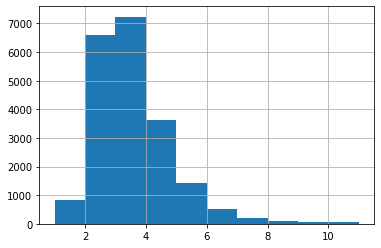

In [51]:
housing["income_cat"].hist()

In [52]:
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

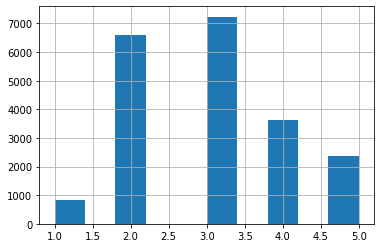

In [53]:
housing["income_cat"].hist()

In [54]:
# option 4
# Stratified sampling

In [55]:
?StratifiedShuffleSplit

In [56]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [57]:
?split.split

In [58]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [59]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [60]:
for set in (strat_train_set, strat_test_set):
    tmp = set.drop(["income_cat"], axis=1, inplace=True)


In [ ]:
# Visualization

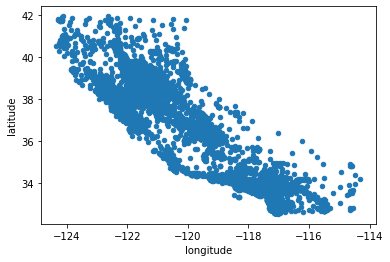

In [63]:
housing.plot(kind="scatter", x="longitude", y="latitude")

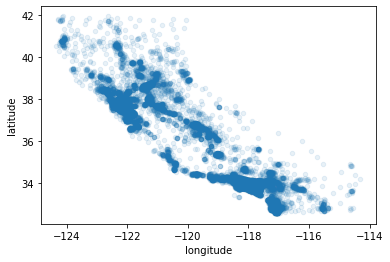

In [64]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

No handles with labels found to put in legend.


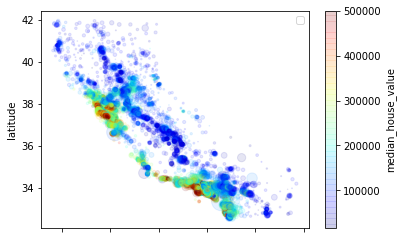

In [71]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
            s=housing["population"]/100, c="median_house_value", 
             cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()


In [72]:
# Correlation

In [73]:
corr_matrix = housing.corr()

In [75]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

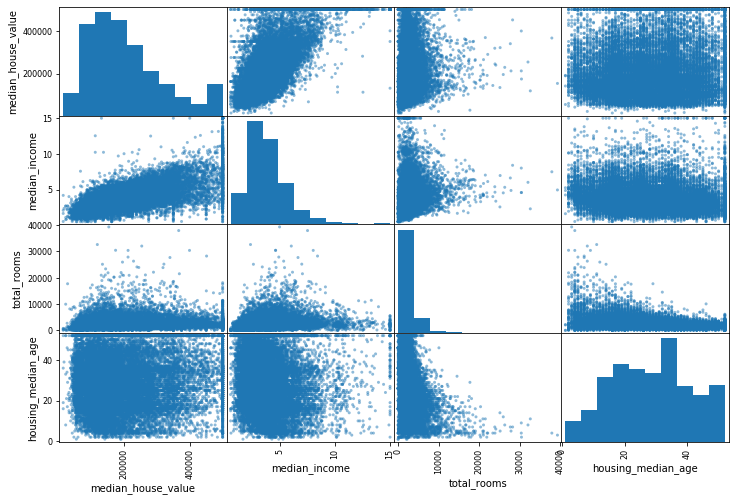

In [82]:
attrs = ["median_house_value", 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attrs], figsize=(12, 8 ))
plt.show()

In [83]:
# Attributes combinations

In [84]:
housing['rooms_per_household'] = housing["total_rooms"] / housing["households"]
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [85]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [86]:
# Prepare data

In [89]:
from sklearn.impute import SimpleImputer as Imputer

imputer = Imputer(strategy="median")

In [90]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [92]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [93]:
imputer.statistics_ 

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  3.00000000e+00,  5.22912879e+00,  2.03162434e-01,
        2.81811565e+00])

In [95]:
X = imputer.transform(housing_num)

In [96]:
housing_transformed = pd.DataFrame(X, columns=housing_num.columns)

In [97]:
# Handling text

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
encoder = LabelEncoder()
housing_proximity_cat = housing['ocean_proximity']
housing_proximity_cat_encoded = encoder.fit_transform(housing_proximity_cat)
housing_proximity_cat_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [107]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_prox_cat_1hot = encoder.fit_transform(housing_proximity_cat_encoded.reshape(-1, 1))

/Users/nick/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [111]:
housing_prox_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [101]:
housing_proximity_cat_encoded.reshape(-1, 1)

array([[3],
       [3],
       [3],
       ...,
       [1],
       [1],
       [1]])

In [103]:
type(housing_proximity_cat_encoded)

numpy.ndarray

In [104]:
housing_proximity_cat_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [105]:
?housing_proximity_cat_encoded.reshape